In [9]:
import pandas as pd
import sqlite3
import os

# create the sqlite DB
db = sqlite3.connect("LAESLData.db")

# read CSV into dataframe
df1 = pd.read_csv("LAESLData.csv", header="infer")

# convert the pandas dataframe to a sqlite table
df1.to_sql("LAESL", db, if_exists="replace")

def run_query(query):
    return pd.read_sql_query(query,db)


os.getcwd()



'C:\\Users\\makim\\LAESLData\\LAESLData'

In [10]:
# view dataframe
# df1
query = ''' 
SELECT * 
FROM LAESL'''
run_query(query)


,index,Unnamed: 0,InitialOfName,Country,Language,Gender,BirthYear,HighSchool_Diploma,US_HighSchool_Diploma/GED,Interested_in_GED
0,0,1,A.A,Egypt,Arabic,F,1986,Yes,No,Yes
1,1,2,R.A,Egypt,Arabic,F,1982,Yes,No,Yes
2,2,3,K.A,Egypt,Arabic,M,1987,Yes,No,Yes
3,3,4,H.A,Morroco,Arabic,M,1983,Yes,No,No
4,4,5,A.A,Iraq,Arabic,F,1980,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...
170,170,174,S.Y,Koirea,Korean,F,1982,Yes,No,No
171,171,175,A.Y,Japan,Japanese,M,1984,Yes,No,No
172,172,176,Z.Y,Algeria,Arabic,F,1987,Yes,No,No
173,173,177,Z.Z,China,Chinese,F,1987,Yes,No,No


# Countries

In [11]:
#Countries in alphabetical order.
query = '''
SELECT DISTINCT Country 
FROM   LAESL 
ORDER  BY Country ASC;

'''

run_query(query)


,Country
0,Afghanistan
1,Algeria
2,Belarus
3,Bolivia
4,Brazil
5,Burundi
6,China
7,Colombia
8,Cuba
9,D.R Congo


# People from each country

In [12]:
# Number of people from each country
query = '''
SELECT Country, COUNT(*) AS "Number_of_people" 
FROM   LAESL 
GROUP  BY Country
ORDER  BY Number_of_people DESC
;

'''

df2 = run_query(query)

# read data out of the database and into dataframe
df2 = df2.sort_values("Number_of_people", ascending = False).reset_index(drop=True)


df2

,Country,Number_of_people
0,Cuba,43
1,Mexico,21
2,Algeria,11
3,China,10
4,Brazil,9
5,Venezuela,6
6,Japan,6
7,Egypt,6
8,D.R Congo,6
9,Colombia,6


#  How many languages

In [13]:
#Speakers in alphabetical order.
query = '''
SELECT   DISTINCT Language 
FROM     LAESL 
ORDER BY Language ASC;

'''

run_query(query)

,Language
0,Arabic
1,Chinese
2,French
3,Hindi
4,Japanese
5,Kazakh
6,Korean
7,Kreyol
8,Nepali
9,Portuguese


In [14]:
# Number of speakers.
query = '''
SELECT   Language, COUNT(*) AS Number_of_Speakers
FROM     LAESL 
GROUP BY Language
ORDER BY Number_of_Speakers DESC;

'''
df3 = run_query(query)

# read data out of the database and into dataframe
df3 = df3.sort_values("Number_of_Speakers", ascending = False).reset_index(drop=True)


df3


,Language,Number_of_Speakers
0,Spanish,90
1,Arabic,30
2,Portuguese,9
3,French,8
4,chinese,6
5,Japanese,6
6,Vietnamese,5
7,Korean,3
8,Hindi,3
9,Kreyol,3


# Genders

In [15]:
# Student's genders.
query = '''
SELECT   Gender, COUNT(*) AS Number
FROM     LAESL
GROUP BY Gender = "M","F";

'''

df4 = run_query(query)

# read data out of the database and into dataframe
df4 = df4.sort_values("Gender", ascending = False).reset_index(drop=True)


df4


,Gender,Number
0,M,58
1,F,117


# Generations

In [16]:
# Student's ages.
query = '''
WITH AgeData as
(
  SELECT  DATE('now') - BirthYear AS [AGE]
  FROM LAESL
),
GroupAge AS
(
  SELECT 
         CASE
             WHEN Age <19 THEN "Under 19" 
             WHEN Age between 20 AND 29 THEN "20-29"   
             WHEN Age between 30 AND 39 THEN "30-39" 
             WHEN Age between 40 AND 49 THEN "40-49" 
             WHEN Age between 50 AND 59 THEN "50-59" 
             WHEN Age between 60 AND 69 THEN "60-69" 
             WHEN Age between 70 AND 79 THEN "70-79"
         END AS [Age Groups]
  FROM AgeData
)
SELECT COUNT(*) AS [AgeGrpCount],
       [Age Groups]
FROM      GroupAge
GROUP BY [Age Groups]
;


'''

df5 = run_query(query)

# read data out of the database and into dataframe
df5 = df5.sort_values("Age Groups", ascending = False).reset_index(drop=True)


df5

,AgeGrpCount,Age Groups
0,1,70-79
1,6,60-69
2,24,50-59
3,36,40-49
4,72,30-39
5,36,20-29


# Average of age

In [17]:
# Average of student's age.
query = '''
SELECT Gender, AVG(DATE('now') - BirthYear) AS Average
FROM  LAESL
GROUP BY Gender;


'''

run_query(query)

,Gender,Average
0,F,38.547009
1,M,38.517241


# HighSchool_Diploma

In [18]:
# How many students have thier High School Diploma.
query = '''
SELECT HighSchool_Diploma, COUNT(*)  AS Number
FROM LAESL
GROUP BY HighSchool_Diploma = "Yes","No";

'''

run_query(query)

,HighSchool_Diploma,Number
0,No,4
1,Yes,171


# Interested in GED

In [19]:
# How many students are interested in GED.
query = '''
SELECT Interested_in_GED, COUNT(*) AS Number
FROM  LAESL
GROUP BY Interested_in_GED = "Yes","No";

'''

run_query(query)

,Interested_in_GED,Number
0,No,124
1,Yes,51


In [20]:
# How many students are interested in GED.
query = '''
SELECT Interested_in_GED, COUNT(CASE WHEN HighSchool_Diploma = "Yes" THEN "YES" ELSE NULL END) AS [Has HS Diploma]
                        , COUNT(CASE WHEN HighSchool_Diploma = "No"  THEN "NO"  ELSE NULL END) AS [No HS Diploma]   
FROM  LAESL
GROUP BY Interested_in_GED  = "Yes","No"

; 


'''

df6 = run_query(query)

# read data out of the database and into dataframe
df6 = df6.sort_values("Interested_in_GED", ascending = False).reset_index(drop=True)


df6

,Interested_in_GED,Has HS Diploma,No HS Diploma
0,Yes,47,4
1,No,124,0


In [21]:
# Plotting by Shane -- requires manual install of plotly library
#from plotly.express import d3_plot
#df.rename(columns={'Number_of_people': 'Number of people'}, inplace=True)
#d3_bar(df, x='Country', y='Number of people', color='Country', title='Number of people from each country')

In [22]:
%matplotlib inline
import plotly
#import plotly.express as px
import matplotlib.pyplot as plt
#import numpy as np




# Visulization for dataframes

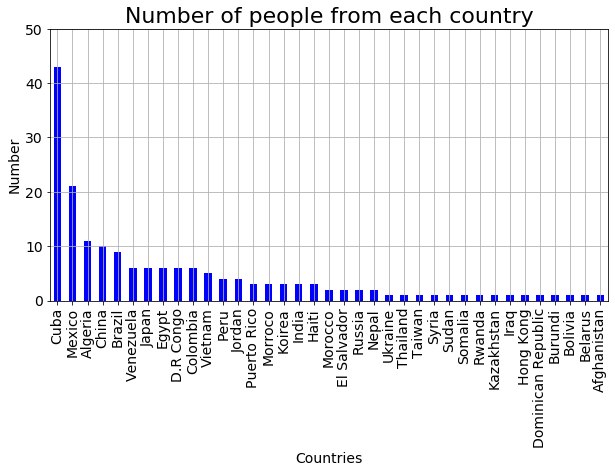

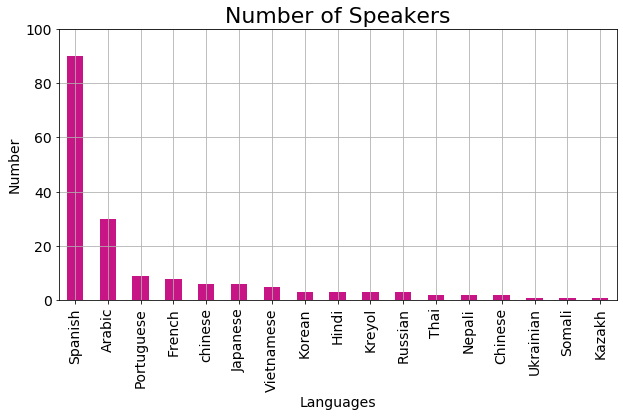

In [23]:
#Visulization for df2(Number of people from each country)
my_data = df2.plot(x="Country", y="Number_of_people" ,kind="bar",
                   legend=None,  color = "blue", grid = True, figsize=(10, 5))
plt.title("Number of people from each country", fontsize = 22)
my_data.set_xlabel("Countries" ,size = 14, weight = "light")
my_data.set_ylabel("Number" ,size = 14, weight = "light")
my_data.set_yticks([0, 10, 20, 30, 40, 50])
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.subplots_adjust(hspace=1.0)

#Visulization for df3(Number of Speakers)
my_data = df3.plot(x="Language",y="Number_of_Speakers" ,kind="bar",
                   legend=None, color = "mediumvioletred", grid = True, figsize=(10, 5))
plt.title("Number of Speakers", fontsize = 22)
my_data.set_xlabel("Languages", size = 14, weight = "light")
my_data.set_ylabel("Number",size = 14, weight = "light")
my_data.set_yticks([0, 20, 40, 60, 80, 100])
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)



plt.show(my_data)

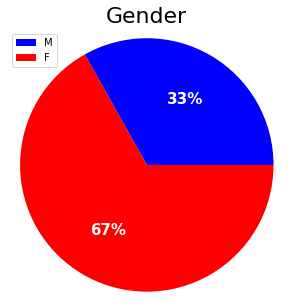

In [24]:
#Visulization for df4(Gender)
fig = plt.figure(figsize = (5, 5))
colors = ["blue", "red"]
label=df4["Gender"]
my_data = plt.pie(df4["Number"],  labels=label, labeldistance=1.1, 
                  textprops={'size':(15) , 'color': "white", 'weight': "bold" }, colors=colors,
                  autopct = "%1.0f%%")
plt.title("Gender", fontsize = 22)
plt.legend()
plt.axis('equal')


plt.show(my_data)

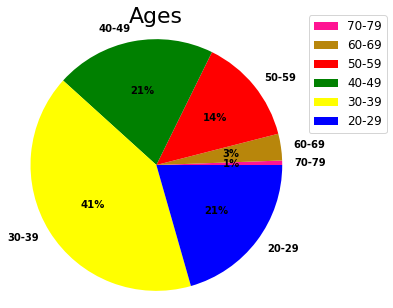

In [25]:
#Visulization for df5(Ages)
fig = plt.figure(figsize = (5, 5))
colors = ["deeppink", "darkgoldenrod", "red", "green", "yellow","blue"]
label=df5["Age Groups"]
my_data = plt.pie(df5["AgeGrpCount"],  labels=label, labeldistance=1.1, 
                  textprops={'size':(10) , 'color': "black", 'weight': "bold" }, colors=colors, autopct = "%1.0f%%")
plt.title("Ages", fontsize = 22)
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', borderaxespad=0, fontsize=12)
plt.axis('equal')


plt.show(my_data)

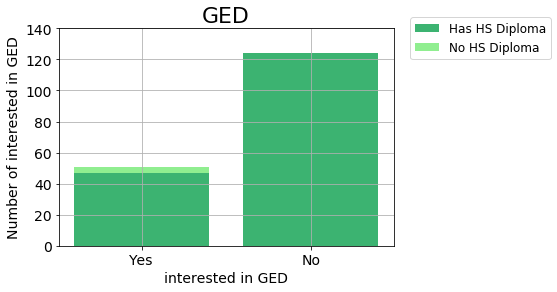

In [26]:
#Visulization for df6(GED)
labels = df6["Interested_in_GED"]
Interested_in_GED = df6["Interested_in_GED"]  
Has_HS_Diploma =  df6["Has HS Diploma"]  
No_HS_Diploma = df6["No HS Diploma"]
width = 0.35

fig, ax = plt.subplots()
plt.bar(Interested_in_GED, Has_HS_Diploma, color="mediumseagreen" ,label = "Has HS Diploma")
plt.bar(Interested_in_GED, No_HS_Diploma, bottom=Has_HS_Diploma,color="lightgreen" ,label = "No HS Diploma")

plt.xlabel("interested in GED", size = 14, weight = "light")  
plt.ylabel("Number of interested in GED", size = 14, weight = "light")
ax.set_yticks([0, 20, 40, 60, 80, 100, 120, 140])
#plt.rcParams["figure.figsize"] = (10, 5)
plt.title("GED", fontsize = 22)
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', borderaxespad=0, fontsize=12)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True) 

#Show numbers on the graph.
#for i, row in df6.iterrows():
    #cs = np.cumsum(row)
    #cs_ = np.hstack([[0], cs[:-1]])
    #positions = (cs + cs_) / 2
    #for v, p in zip(row, positions):
        #ax.text(i - 1, p, str(v), color="white",
                #horizontalalignment="center",
                #verticalalignment="center")




plt.show(my_data)